In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st #Gerar distribuições

In [ ]:
# Lista de 31 músicas
lista_musicas = [
    "Música 1", "Música 2", "Música 3", "Música 4", "Música 5",
    "Música 6", "Música 7", "Música 8", "Música 9", "Música 10",
    "Música 11", "Música 12", "Música 13", "Música 14", "Música 15",
    "Música 16", "Música 17", "Música 18", "Música 19", "Música 20",
    "Música 21", "Música 22", "Música 23", "Música 24", "Música 25",
    "Música 26", "Música 27", "Música 28", "Música 29", "Música 30", "Música 31"
]

# Número de votos
num_votos = 72

# Array para armazenar os votos de cada música
votos = {musica: 0 for musica in lista_musicas}

# Simulação dos votos das 72 pessoas
for voto in range(num_votos):
    # Escolher 3 músicas distintas para cada pessoa
    votos_pessoa = np.random.choice(lista_musicas, 3, replace=False)
    # Adicionar 1 voto para cada uma das músicas escolhidas pela pessoa
    for musica in votos_pessoa:
        votos[musica] += 1

# Exibir os resultados dos votos
for musica, num_votos in votos.items():
    print(f"{musica}: {num_votos} votos")

# Criar DataFrame a partir do dicionário de votos
df = pd.DataFrame(list(votos.items()), columns=['Música', 'Votos'])

Música 1: 2 votos
Música 2: 7 votos
Música 3: 3 votos
Música 4: 4 votos
Música 5: 9 votos
Música 6: 8 votos
Música 7: 6 votos
Música 8: 9 votos
Música 9: 5 votos
Música 10: 6 votos
Música 11: 3 votos
Música 12: 11 votos
Música 13: 8 votos
Música 14: 12 votos
Música 15: 10 votos
Música 16: 9 votos
Música 17: 3 votos
Música 18: 7 votos
Música 19: 9 votos
Música 20: 11 votos
Música 21: 6 votos
Música 22: 5 votos
Música 23: 11 votos
Música 24: 5 votos
Música 25: 6 votos
Música 26: 10 votos
Música 27: 5 votos
Música 28: 6 votos
Música 29: 5 votos
Música 30: 8 votos
Música 31: 7 votos


In [ ]:
df

,Música,Votos
0,Música 1,2
1,Música 2,7
2,Música 3,3
3,Música 4,4
4,Música 5,9
5,Música 6,8
6,Música 7,6
7,Música 8,9
8,Música 9,5
9,Música 10,6


In [ ]:
latex_table = df.to_latex(index=False)

In [ ]:
print(latex_table)

\begin{tabular}{lr}
\toprule
Música & Votos \\
\midrule
Música 1 & 2 \\
Música 2 & 7 \\
Música 3 & 3 \\
Música 4 & 4 \\
Música 5 & 9 \\
Música 6 & 8 \\
Música 7 & 6 \\
Música 8 & 9 \\
Música 9 & 5 \\
Música 10 & 6 \\
Música 11 & 3 \\
Música 12 & 11 \\
Música 13 & 8 \\
Música 14 & 12 \\
Música 15 & 10 \\
Música 16 & 9 \\
Música 17 & 3 \\
Música 18 & 7 \\
Música 19 & 9 \\
Música 20 & 11 \\
Música 21 & 6 \\
Música 22 & 5 \\
Música 23 & 11 \\
Música 24 & 5 \\
Música 25 & 6 \\
Música 26 & 10 \\
Música 27 & 5 \\
Música 28 & 6 \\
Música 29 & 5 \\
Música 30 & 8 \\
Música 31 & 7 \\
\bottomrule
\end{tabular}



In [ ]:
df.to_excel('df_teste.xlsx')

<Axes: xlabel='Votos', ylabel='Count'>

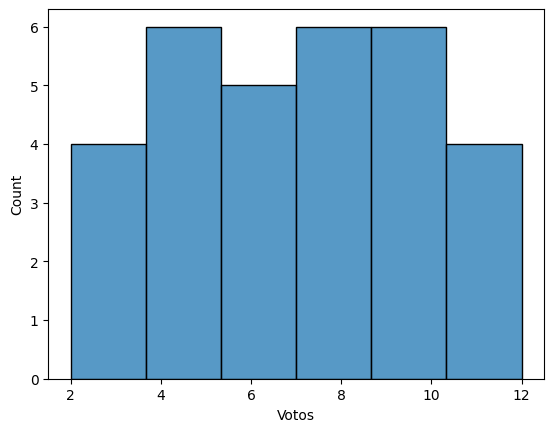

In [ ]:
sns.histplot(x = "Votos",data = df)

In [ ]:
#Definindo as prováveis distribuições em uma lista
dist = [st.laplace,st.norm,st.expon,st.uniform]
#Laplace, Normal, Exponencial e Uniforme
emvs = [] #lista para os valores das estimativas de cada distribuição
for distribuicao in dist:
  params = distribuicao.fit(df['Votos']) #calculo dos parametros
  emv = distribuicao.nnlf(params,df['Votos']) #Uso do estimador
  emvs.append(emv) #Armazenando os dados

melhor_fit = sorted(zip(dist,emvs),key = lambda d:d[1])[0]
print(f"O Melhor ajuste pesquisado usando {melhor_fit[0].name}, \
      Valor do Estimador {melhor_fit[1]} para a variável Votos")
# Ordenando as estimativas do menor para o maior valor de nnlf
emvs_ordenados = sorted(zip(dist, emvs), key=lambda d: d[1])

# Imprimindo os valores ordenados e suas distribuições correspondentes
print("\nDistribuições ordenadas do menor para o maior valor de nnlf:")
for distribuicao, emv in emvs_ordenados:
    print(f"Distribuição: {distribuicao.name}, nnlf: {emv}")


O Melhor ajuste pesquisado usando uniform,       Valor do Estimador 71.38013788281542 para a variável Votos

Distribuições ordenadas do menor para o maior valor de nnlf:
Distribuição: uniform, nnlf: 71.38013788281542
Distribuição: norm, nnlf: 74.14639752095866
Distribuição: laplace, nnlf: 77.2912609008338
Distribuição: expon, nnlf: 80.69192733578298


In [ ]:
resultados = [] # Lista de resultados
distribuicoes = ['laplace', 'norm', 'expon', 'uniform']

for distribuicao in distribuicoes:
    dist_prob = getattr(st, distribuicao) # Encontrar módulo correspondente a distribuição no Scipy
    params = dist_prob.fit(df["Votos"]) # Ajuste dos dados
    resultado = st.kstest(df["Votos"], distribuicao, args=params)
    # Existem 3 argumentos para o teste: os dados, o nome da distribuição e os parametros ajustados
    resultados.append(resultado)
    print(resultado)

# Analisando o p-valor
for i, resultado in enumerate(resultados):
    p_valor = resultado[1]
    distribuicao = distribuicoes[i]
    if p_valor < 0.05:
        print(f"O p-valor para a distribuição {distribuicao} é {p_valor}, portanto rejeitamos a hipótese nula.")
    else:
        print(f"O p-valor para a distribuição {distribuicao} é {p_valor}, portanto não rejeitamos a hipótese nula.")

KstestResult(statistic=0.2096774193548387, pvalue=0.11290162897977163, statistic_location=6, statistic_sign=-1)
KstestResult(statistic=0.18927903200720053, pvalue=0.1905724990962856, statistic_location=6, statistic_sign=1)
KstestResult(statistic=0.2401823869398791, pvalue=0.04657165831665622, statistic_location=6, statistic_sign=-1)
KstestResult(statistic=0.3196480938416422, pvalue=0.0025670827684596276, statistic_location=8, statistic_sign=1)
O p-valor para a distribuição laplace é 0.11290162897977163, portanto não rejeitamos a hipótese nula.
O p-valor para a distribuição norm é 0.1905724990962856, portanto não rejeitamos a hipótese nula.
O p-valor para a distribuição expon é 0.04657165831665622, portanto rejeitamos a hipótese nula.
O p-valor para a distribuição uniform é 0.0025670827684596276, portanto rejeitamos a hipótese nula.


In [ ]:
#Percebe-se que podemos interpretar os nossos votos como uma distribuição normal dessa forma
df_est_descritiva = df.describe()

In [ ]:
df_est_descritiva

,Votos
count,31.000000
mean,6.967742
std,2.689286
min,2.000000
25%,5.000000
50%,7.000000
75%,9.000000
max,12.000000


In [ ]:
latex_table_ED = df_est_descritiva.to_latex(index=True)

In [ ]:
print(latex_table_ED )

\begin{tabular}{lr}
\toprule
 & Votos \\
\midrule
count & 31.000000 \\
mean & 6.967742 \\
std & 2.689286 \\
min & 2.000000 \\
25% & 5.000000 \\
50% & 7.000000 \\
75% & 9.000000 \\
max & 12.000000 \\
\bottomrule
\end{tabular}



In [ ]:
def verificar_percentil(votos, percentil_75):
  """
  Verifica se o valor está dentro do percentil 75%.

  Args:
    votos: Valor a ser verificado.
    percentil_75: Percentil 75% da música.

  Returns:
    "Está dentro do Percentil" se o valor estiver dentro do percentil, "Está Fora" caso contrário.
  """
  if votos <= percentil_75:
    return "Está dentro do Percentil"
  else:
    return "Está Fora"

In [ ]:
# Critérios de Classificação
media = np.mean(df['Votos']) #Cálculo da Média
df['Critério Média'] = np.where(df['Votos'] <=
                                media, 'Reprovada', 'Aprovada')
#Percentil
percentil_75 = np.quantile(df['Votos'],0.75)
df['Percentil'] = np.where(df['Votos'] > percentil_75, True, False)

In [ ]:
df

,Música,Votos,Critério Média,Percentil
0,Música 1,2,Reprovada,False
1,Música 2,7,Aprovada,False
2,Música 3,3,Reprovada,False
3,Música 4,4,Reprovada,False
4,Música 5,9,Aprovada,False
5,Música 6,8,Aprovada,False
6,Música 7,6,Reprovada,False
7,Música 8,9,Aprovada,False
8,Música 9,5,Reprovada,False
9,Música 10,6,Reprovada,False


In [ ]:
latex_table = df.to_latex(index=False)

In [ ]:
print(latex_table)

\begin{tabular}{lrlr}
\toprule
Música & Votos & Critério Média & Percentil \\
\midrule
Música 1 & 2 & Reprovada & False \\
Música 2 & 7 & Aprovada & False \\
Música 3 & 3 & Reprovada & False \\
Música 4 & 4 & Reprovada & False \\
Música 5 & 9 & Aprovada & False \\
Música 6 & 8 & Aprovada & False \\
Música 7 & 6 & Reprovada & False \\
Música 8 & 9 & Aprovada & False \\
Música 9 & 5 & Reprovada & False \\
Música 10 & 6 & Reprovada & False \\
Música 11 & 3 & Reprovada & False \\
Música 12 & 11 & Aprovada & True \\
Música 13 & 8 & Aprovada & False \\
Música 14 & 12 & Aprovada & True \\
Música 15 & 10 & Aprovada & True \\
Música 16 & 9 & Aprovada & False \\
Música 17 & 3 & Reprovada & False \\
Música 18 & 7 & Aprovada & False \\
Música 19 & 9 & Aprovada & False \\
Música 20 & 11 & Aprovada & True \\
Música 21 & 6 & Reprovada & False \\
Música 22 & 5 & Reprovada & False \\
Música 23 & 11 & Aprovada & True \\
Música 24 & 5 & Reprovada & False \\
Música 25 & 6 & Reprovada & False \\
Música 26 

In [ ]:
df_1_turno = df[
    (df['Critério Média'] == 'Aprovada') & (df['Percentil'] == True)]

In [ ]:
df_1_turno.sort_values(by = 'Votos',ascending = False)

,Música,Votos,Critério Média,Percentil
13,Música 14,12,Aprovada,True
11,Música 12,11,Aprovada,True
19,Música 20,11,Aprovada,True
22,Música 23,11,Aprovada,True
14,Música 15,10,Aprovada,True
25,Música 26,10,Aprovada,True


In [ ]:
print(df_1_turno)

       Música  Votos Critério Média  Percentil
11  Música 12     11       Aprovada       True
13  Música 14     12       Aprovada       True
14  Música 15     10       Aprovada       True
19  Música 20     11       Aprovada       True
22  Música 23     11       Aprovada       True
25  Música 26     10       Aprovada       True


In [ ]:
latex_table = df_1_turno.to_latex(index=False)

In [ ]:
print(latex_table)

\begin{tabular}{lrlr}
\toprule
Música & Votos & Critério Média & Percentil \\
\midrule
Música 12 & 11 & Aprovada & True \\
Música 14 & 12 & Aprovada & True \\
Música 15 & 10 & Aprovada & True \\
Música 20 & 11 & Aprovada & True \\
Música 23 & 11 & Aprovada & True \\
Música 26 & 10 & Aprovada & True \\
\bottomrule
\end{tabular}

